# Using a DESC Equilibrium Output

## Loading in a DESC Equilibrium
DESC saves its output files as .h5 files, which can be loaded using the load function contained in the `desc.io` module

In [2]:
import desc.io

In DESC, equilibrium solutions are stored as `Equilibrium` objects, which contain the spectral coefficients of the solved equilibrium, as well as last-closed-flux-surface used to solve the equilibrium, input pressure and iota profiles, and other quantities that define the equilibrium. 

Often in DESC, a continuation method is employed to solve for equilibria, where a sequence of related equilibria are computed until the final resolution and input parameters are reached. When calling DESC from the command line, this sequence of `Equilibrium` objects are stored inside of an `EquilibriaFamily` object, which essentially acts as a list of `Equilibrium` objects, with some extra functionality to aid in the continuation method.

We will load in the solution to the `HELIOTRON` example input file from the DESC repo now.

In [3]:
eq_fam = desc.io.load('../examples/DESC/HELIOTRON_output.h5')
print(type(eq_fam))

DESC version 0.5.0+15.g88548ac, using JAX backend, jax version=0.2.25, jaxlib version=0.1.76, dtype=float64
Using device: CPU, with 23.30 GB available memory
<class 'desc.equilibrium.EquilibriaFamily'>


As you can see, the object we just loaded in is an `EquilibriaFamily`. We can check to see how many equilibria this family contains (3, each corresponding to a different step in the continuation method outlined in the `HELIOTRON` input file)

In [4]:
len(eq_fam)

3

We can visualize the different equilibria with the `plot_comparison` function, which plots flux surfaces and the contours of constant SFL poloidal angle $\vartheta$ for multiple equilibria

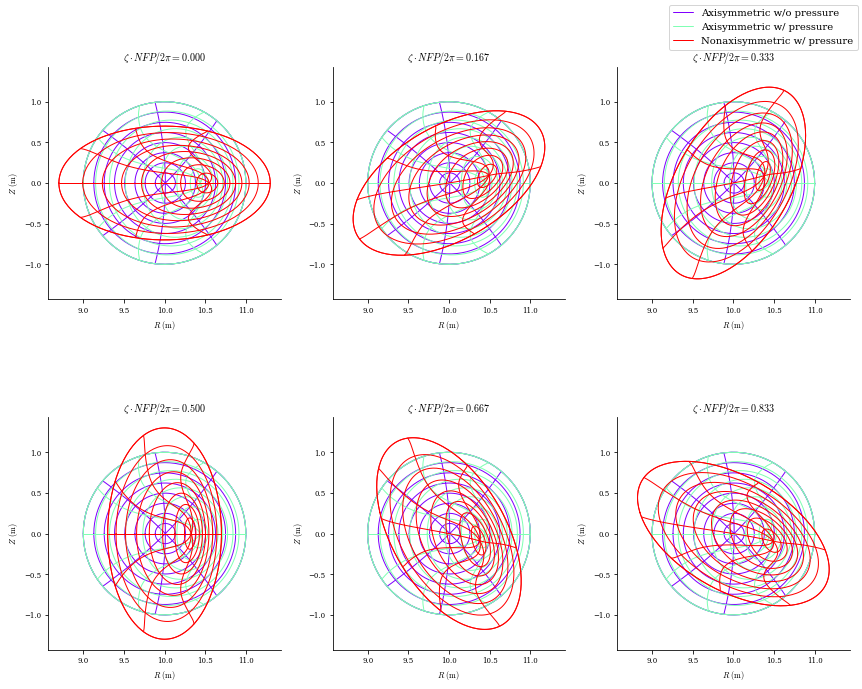

In [6]:
%matplotlib inline
from desc.plotting import plot_comparison
fig, ax = plot_comparison(eqs=[eq_fam[0],eq_fam[1],eq_fam[2]],labels=['Axisymmetric w/o pressure','Axisymmetric w/ pressure','Nonaxisymmetric w/ pressure'])

## Computing Quantities from a DESC Equilibrium

Now let's focus on a single equilibrium. We can choose the final solution by indexing the last element of `eq_fam`

In [8]:
eq = eq_fam[-1]
print(type(eq))

<class 'desc.equilibrium.Equilibrium'>


Notice now we have an `Equilibrium` object, not an `EquilibriaFamily`. Printing an `Equilibrium` will list some information about it

In [9]:
print(eq)

Equilibrium at 0x7f635c5ee040 (L=24, M=12, N=3, NFP=19.0, sym=1, spectral_indexing=fringe)


Here we can see that this equilibrium solution has a radial resolution of `L=24`, a poloidal resolution of `M=12`, and a toroidal resolution of `N=3`. It is stellarator symmetric (`sym=1`), and the spectral indexing scheme used for the Zernike Polynomial basis was the `fringe` indexing (for more information on the indexing schemes see the [DESC documentation](https://desc-docs.readthedocs.io/en/latest/notebooks/basis_grid.html#Zernike-Polynomials-and-Fourier-Zernike-basis) )

`Equilibrium` objects have a `compute` method which can be used to compute many useful quantities that are commonly needed from an equilibrium. The `compute` method takes as arguments the name (as a string) of the desired quantitity, and optionally the grid you wish the quantity to be computed on (if no grid is supplied it defaults to returning the quantity in a 3-dimensional grid). It then returns a dictionary containing that quantity, as well as all of the intermediate quantities needed to compute the desired quantity.

As an example, let's plot the pressure and iota profile of this equilibrium, as well as the magnetic field strength on the $\rho=0.5$ surface.

In [ ]:
eq.compute('